/home/markakis/.local/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/tmp/ipykernel_13535/3228670855.py:43: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


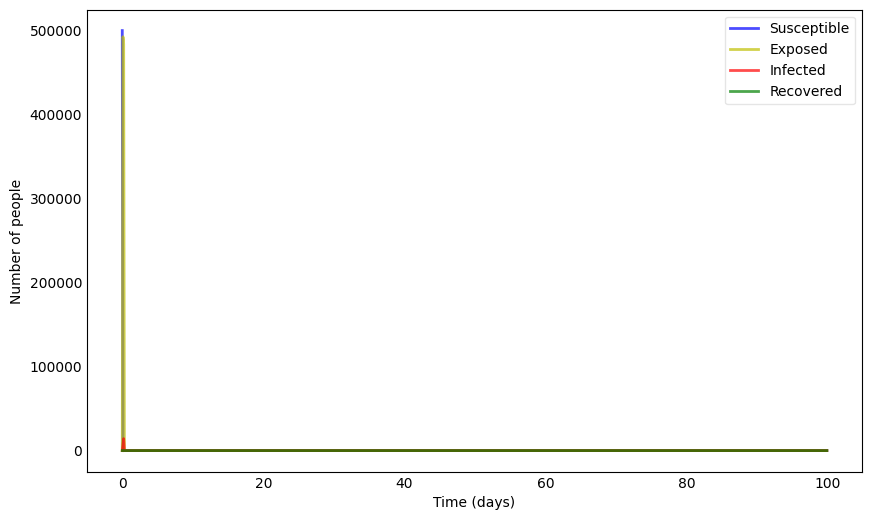

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline 

def SEIR_model(y, t, N, alpha, beta, gamma, epsilon, mu):
    S, E, I, R = y
    dSdt = -mu*N -beta * S * I - mu*S
    dEdt = beta * S * I - (mu + epsilon) * E
    dIdt = epsilon * E - (gamma + mu) * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

N0 = 500e3
alpha = 0.002 
beta = 0.35 
gamma = 1/14
epsilon = 1/5
mu = 1/100
E0, I0, R0 = 100, 1, 0
S0 = N0-E0-I0

dt = .1
tstart = 0
tend = 100
t = np.arange(tstart, tend, dt) 
y0 = S0, E0, I0, R0

sim = odeint(SEIR_model, y0, t, args=(N0, alpha, beta, gamma, epsilon, mu))
S, E, I, R = sim.T

f, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of people')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

plt.show();